# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Presidential-Debate-Open-Questions-Analysis" data-toc-modified-id="Presidential-Debate-Open-Questions-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Presidential Debate Open Questions Analysis</a></div><div class="lev2 toc-item"><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></div><div class="lev3 toc-item"><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data cleaning</a></div><div class="lev2 toc-item"><a href="#Create-DataFrame-for-State-Analysis" data-toc-modified-id="Create-DataFrame-for-State-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create DataFrame for State Analysis</a></div><div class="lev2 toc-item"><a href="#Extract-and-Save-Corpora" data-toc-modified-id="Extract-and-Save-Corpora-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Extract and Save Corpora</a></div><div class="lev2 toc-item"><a href="#Phrase-Modeling" data-toc-modified-id="Phrase-Modeling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Phrase Modeling</a></div><div class="lev3 toc-item"><a href="#Apply-our-first-order-phrase-model-to-join-word-pairs" data-toc-modified-id="Apply-our-first-order-phrase-model-to-join-word-pairs-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Apply our first-order phrase model to join word pairs</a></div><div class="lev3 toc-item"><a href="#Applying-our-second-order-phrase-model-to-join-longer-phrases" data-toc-modified-id="Applying-our-second-order-phrase-model-to-join-longer-phrases-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Applying our second-order phrase model to join longer phrases</a></div><div class="lev3 toc-item"><a href="#Remove-stopwords" data-toc-modified-id="Remove-stopwords-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Remove stopwords</a></div><div class="lev3 toc-item"><a href="#Add-final-corpus-to-grouped-by-states-and-submitters-DataFrames" data-toc-modified-id="Add-final-corpus-to-grouped-by-states-and-submitters-DataFrames-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Add final corpus to grouped-by states and submitters DataFrames</a></div><div class="lev3 toc-item"><a href="#Add-final-corpus-to-grouped-by-states-and-submitters-DataFrames" data-toc-modified-id="Add-final-corpus-to-grouped-by-states-and-submitters-DataFrames-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Add final corpus to grouped-by states and submitters DataFrames</a></div><div class="lev2 toc-item"><a href="#Topic-Modeling-with-Latent-Dirichlet-Allocation-(LDA)" data-toc-modified-id="Topic-Modeling-with-Latent-Dirichlet-Allocation-(LDA)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Topic Modeling with Latent Dirichlet Allocation (LDA)</a></div><div class="lev3 toc-item"><a href="#Parameters-to-tweak-for-LDA" data-toc-modified-id="Parameters-to-tweak-for-LDA-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Parameters to tweak for LDA</a></div><div class="lev3 toc-item"><a href="#Create-a-bag-of-words-representation" data-toc-modified-id="Create-a-bag-of-words-representation-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Create a bag-of-words representation</a></div><div class="lev3 toc-item"><a href="#Implement-LDA-topic-modeling" data-toc-modified-id="Implement-LDA-topic-modeling-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Implement LDA topic modeling</a></div><div class="lev2 toc-item"><a href="#Visualzing-topics-with-pyLDAviz" data-toc-modified-id="Visualzing-topics-with-pyLDAviz-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualzing topics with pyLDAviz</a></div><div class="lev3 toc-item"><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Sentiment Analysis</a></div>

# Presidential Debate Open Questions Analysis

Scraped from [Presidential Debate Open Questions][1] after debate October 9, 2016 at 11pm

Instructions for contributors, login required to post:

<img src="./images/poq_instructions_screenshot.jpg" 
alt="instructions screenshot" align="left"/>

[1]:https://presidentialopenquestions.com/watch/

In [1]:
import codecs
import json
from pprint import pprint
from IPython.display import display
import pandas as pd
import string, os

with open('data/data_20161016_2159_all.json') as f:    
    data = json.load(f)
    
df = pd.DataFrame(data)
df = df.drop(['issue_path', 'question_path'], axis=1)
df['submission_date'] = pd.to_datetime(df['submission_date'])

start_date = df['submission_date'].max()
end_date = df['submission_date'].min()
date_range = start_date - end_date
display(pd.DataFrame([[start_date, end_date, date_range]], 
                     columns=['start date', 'end date', 'date range']))

,start date,end date,date range
0,2016-10-09 19:31:00,2016-09-26 12:41:00,13 days 06:50:00


In [2]:
df.head()

,issue_area,question,submission_date,submitter_location,submitters,vote_count
0,Economy & Jobs,"What, if anything, do you plan to do to ensure...",2016-10-09 18:51:00,CT,Stephanie C.,1
1,Society & Community,Funding for more police officers and better tr...,2016-10-09 19:28:00,FL,Donna T.,1
2,Civil Rights,Can you change the FCCâs news distortion po...,2016-10-09 17:44:00,NV,jim m.,1
3,Foreign Policy & Military,"What would any of you think the passing of ""JA...",2016-10-08 12:52:00,TX,Edgar G.,1
4,Health,Would you commit to ending the Cadillac Tax on...,2016-10-08 13:28:00,NY,Ken W.,1


The most popular question:


,issue_area,question,submission_date,submitter_location,submitters,vote_count
15864,Society & Community,Would you support requiring criminal backgroun...,2016-09-28 21:32:00,CA,Richard M.,75617


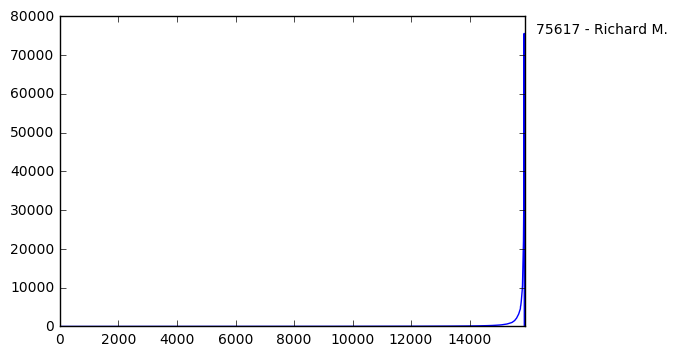

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

df['vote_count'].plot()

# Maximum value in the data set
MaxValue = df['vote_count'].max()

# Name associated with the maximum value
MaxName = df['submitters'][df['vote_count'] == df['vote_count'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + str(MaxName[0])

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular question:")
display(df[df['vote_count'] == df['vote_count'].max()])


plt.show()

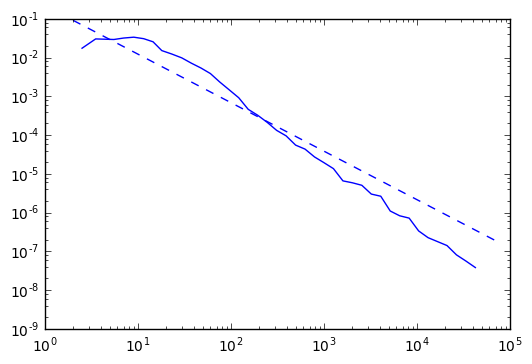

alpha=  1.25169123624   sigma=  0.00199666932227


In [4]:
import powerlaw
import numpy as np

fit = powerlaw.Fit(np.array(df['vote_count'])+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf(color= 'b')
plt.show()

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

In [5]:
grouped = df.groupby('submitter_location').size()
grouped.reset_index()
grouped.sort_values(inplace=True, ascending=False)
display(grouped[:10])

# could also use:
# df['submitter_location'].value_counts()[:10]

submitter_location
CA    2126
NY    1296
TX     983
FL     827
IL     717
PA     583
NJ     548
VA     534
OH     510
WA     457
dtype: int64

## Preprocessing

### Data cleaning

In [6]:
# drop exact dupclicates
from copy import deepcopy
df_original = deepcopy(df)
df = df.drop_duplicates().reset_index(drop=True)

# summary of duplicate information
sum_questions = len(df)
print('all questions: {}'.format(sum_questions))

# analyze duplicates relevant for state-by-state comparisons, 
# vote-to-question analysis, and topic modeling on questions
n_dupes_different_states = (
    sum(df.duplicated('question')) 
    - sum(df.duplicated(['question', 'submitter_location'])))

sum_all_votes = df['vote_count'].sum()
sum_votes_duplicate_questions = (  # assumes sorted by vote_count, ascending
    df.loc[df.duplicated('question', keep='last'), 'vote_count'].sum())

print('duplicate questions from differing states: {} ({:.2%})'.format(
       n_dupes_different_states, 
       n_dupes_different_states/sum_questions))  # not significant

print('votes across duplicate questions: {} ({:.2%})'.format(
       sum_votes_duplicate_questions, 
       sum_votes_duplicate_questions/sum_all_votes))  # not significant

all questions: 15863
duplicate questions from differing states: 30 (0.19%)
votes across duplicate questions: 2019 (0.06%)


**Conclusion**: Only dropping exact duplicates is sufficient for our purposes

In [7]:
import spacy
import pandas as pd
import itertools as it

nlp = spacy.load('en')

In [8]:
# for debugging/testing
from copy import deepcopy
df1 = deepcopy(df)

In [9]:
# Remove unrecognized words

df = deepcopy(df1)

from collections import Counter
cnt_strange_words = Counter()
has_strange_word = [False]*len(df)
all_words = 0
empty_indices = []

In [10]:
for i, question in enumerate(nlp.pipe(df['question'])):
    updated = str(question)
    
    for token in question:
        if token.lower_ in nlp.vocab:
            all_words += 1
        elif not (token.is_punct or token.is_space):
            cnt_strange_words.update([token.lower_])
            has_strange_word[i] = True
            # will remove extra whitespace later
            updated = updated.replace(str(token), '')
    
    if updated is '':
        empty_indices += [i]
    elif has_strange_word[i]:
        df.set_value(i, 'question', updated) 
            
print(all_words)
print(sum(has_strange_word))
print()
print(df.loc[has_strange_word, ['question']].values[:5])

print('dropping rows that would be empty after correcting...')
display(df.iloc[empty_indices])
df = df.drop(df.index[empty_indices]).reset_index(drop=True)

205332
819

[[' Can you change the  news distortion policy into law?']
 [ 'What would any of you think the passing of "" affect or expose  americans?']
 ['Will you help   wage workers who lack updated skills 4 2days jobs?']
 ['What  would you do to improve the US tax code?']
 ['What will your policy be toward  if elected, in terms of military?']]
dropping rows that would be empty after correcting...


,issue_area,question,submission_date,submitter_location,submitters,vote_count
6559,Government & Elections,Imagration,2016-10-01 23:32:00,CA,Dennis C.,15


In [11]:
# explore types and usage of punctuation, will remove with spaCy ahead

questions_w_special = []
special_char = []
exceptions = set(['!', '\"', '\'', '?', ',', '%', '$', '/', '-', '&', '.'])
invalid_chars = set(string.punctuation) - exceptions
for q in df['question']:
    if any(char in invalid_chars for char in q):
        questions_w_special.append(q)
        for c in q:
            if c in invalid_chars:
                special_char.append(c)
print(set(special_char))
display(questions_w_special[:10])

{')', '+', ']', '>', ';', '*', '(', '_', '#', '[', ':', '~'}


['Shared Sacrifice: do you consider it a shared sacrifice to shop?',
 'Justify increase # of refugees & Cost 5yrs  for refugees',
 'The SS disability process can take 3+ yrs.  What can be done w/ the backlog?',
 "What's larger threat: people voting more than once or paperless voting machines?",
 'ILLEGAL IMMIGRATION: Will you work to revoke the birthright citizenship?',
 'War On Terror. War On Drugs. Why not this: War on Poverty.',
 'Would you support adjusting existing  laws ( 1244) to stimulate investment?',
 'Who are  Compass)?',
 'What would you do to prevent the next cyber hack on our ) ?',
 'What is the primary mission of our schools now: education or indoctrination?']

## Create DataFrame for State Analysis

In [12]:
def qs_for_state(questions_df, state, q_col):
    '''
    generator function that yields unescaped 
    questions for a given state.
    '''
    
    df = questions_df
    for i, row in df[df['submitter_location']==state].iterrows():
        q = row[q_col]
        q = q.replace('\n', ' ')
        q = q.replace('\r', ' ')
        yield q + '\n'  # normalized to one line per question

def states_q_data(questions_df, states, q_col):
    for state in states:
        yield (state, ' '.join(qs_for_state(questions_df, state, q_col)))

def combine_qs_for_states(questions_df, states, q_col='question'):

    combined_qs = pd.DataFrame(states_q_data(questions_df, states, q_col), 
                               columns=['state', q_col])
    combined_qs = combined_qs.set_index('state')
    
    return combined_qs

In [15]:
data_directory = os.path.join('.', 'data')
states_data_filepath = os.path.join(data_directory,
                                    'state_combined_list.json')

with open(states_data_filepath) as f:    
        states_data = json.load(f)

df_states = pd.DataFrame(states_data,
                         columns=['state', 'adult_pop', 'partisanship'])
df_states = df_states.set_index('state')
df_states = df_states.join(df['submitter_location'].value_counts())
df_states.columns = df_states.columns.str.replace('submitter_location','q_count')

df_states = df_states.join(
    combine_qs_for_states(df, list(df_states.index)))

## Extract and Save Corpora

In [16]:
import os

def verify_all_docs_written_to_file(source_df, filepath):
    '''
    provides printed verification that the number of documents 
    in the corpus text file matches total number of questions 
    or states depending on the grouping.
    '''
    
    with open(filepath) as f:
        for actual, _ in enumerate(f.readlines()):
            pass
        
    expected = len(source_df)
    actual += 1  # some count adjustment
    if actual == len(source_df):
        return ('All {} documents written to file, one per line.'
                .format(actual))
    else:
        return ('Oops! Wrote {} lines to file instead of {}'
                .format(actual, expected))   

def extract_save_corpus(source_df, filepath):
    '''
    extracts questions from a DataFrame into documents, 
    each document representing a single question or all 
    questions for a state, and saves corpus as text file.
    '''
    
    with open(filepath, 'w') as f:
        for q in source_df['question']:
            q = q.replace('\n', ' ')
            q = q.replace('\r', ' ')
            f.write(q + '\n')  # normalized to one line per document
            
    return verify_all_docs_written_to_file(source_df, filepath)

intermediate_directory = os.path.join('.', 'intermediate')
submitters_questions_filepath = os.path.join(intermediate_directory,
                                          'submitters_questions.txt')

extract_save_corpus(df, submitters_questions_filepath)

'All 15862 documents written to file, one per line.'

## Phrase Modeling

In [17]:
# Remove punctuation and lemmatize the text
import spacy
import pandas as pd

nlp = spacy.load('en')

unigram_questions_filepath = os.path.join(intermediate_directory,
                                          'unigram_questions.txt')

In [19]:
def punct_space(token):
    return token.is_punct or token.is_space

def line_review(filename):
    """
    reads in questions from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filename, encoding='utf_8') as f:
        for question in f:
            yield question
            
def lemmatized_questions(filename):
    """
    generator function to use spaCy to parse reviews,
    lemmatize the text, and yield sentences
    """
    
    for parsed_question in nlp.pipe(line_review(filename), n_threads=4):
            yield u' '.join([token.lemma_ for token in parsed_question
                             if not punct_space(token)])


with open(unigram_questions_filepath, 'w') as f:
    for question in lemmatized_questions(submitters_questions_filepath):
        f.write(question + '\n')

print(verify_all_docs_written_to_file(df, unigram_questions_filepath))

All 15862 documents written to file, one per line.


### Apply our first-order phrase model to join word pairs

In [20]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

unigram_questions = LineSentence(unigram_questions_filepath, 
                                 max_sentence_length=100000)
bigram_model = Phrases(unigram_questions)
bigram_questions_filepath = os.path.join(intermediate_directory,
                                         'bigram_questions_all.txt')

with open(bigram_questions_filepath, 'w', encoding='utf_8') as f:
        
        for unigram_question in unigram_questions:    
            bigram_questions = u' '.join(bigram_model[unigram_question])
            f.write(bigram_questions + '\n')

print(verify_all_docs_written_to_file(df, bigram_questions_filepath))    

All 15862 documents written to file, one per line.


### Applying our second-order phrase model to join longer phrases

In [21]:
bigram_questions = LineSentence(bigram_questions_filepath,
                               max_sentence_length=100000)
trigram_model = Phrases(bigram_questions)
trigram_questions_filepath = os.path.join(intermediate_directory,
                                          'trigram_questions_all.txt')

with codecs.open(trigram_questions_filepath, 'w') as f:
        
        for bigram_question in bigram_questions:
            
            trigram_question = u' '.join(trigram_model[bigram_question])
            f.write(trigram_question + '\n')

print(verify_all_docs_written_to_file(df, trigram_questions_filepath))

All 15862 documents written to file, one per line.


### Remove stopwords

In [22]:
trigram_questions = LineSentence(trigram_questions_filepath,
                                max_sentence_length=100000)
trigram_transformed_filepath = os.path.join(intermediate_directory,
                                'trigram_transformed_questions.txt')
words_to_exclude = set([u'support', u'plan', u'be_your_plan', 'as_president'])

with codecs.open(trigram_transformed_filepath, 'w', encoding='utf_8') as f:
    for trigram_question in trigram_questions:

        trigram_question = [term for term in trigram_question
                            if term not in spacy.en.STOPWORDS | words_to_exclude]

        # write the transformed review as a line in the new file
        trigram_question = u' '.join(trigram_question)
        f.write(trigram_question + '\n')

print(verify_all_docs_written_to_file(df, trigram_transformed_filepath))

All 15862 documents written to file, one per line.


### Add final corpus to grouped-by states and submitters DataFrames

### Add final corpus to grouped-by states and submitters DataFrames

In [23]:
with codecs.open(trigram_transformed_filepath, encoding='utf-8') as f:    
    data = f.readlines()

final_corpus = pd.Series(data, name='question')

if 'question_' not in df.columns:
    df = df.join(final_corpus, rsuffix='_')

all_w_trigram_transformed = os.path.join(intermediate_directory,
                                          'all_w_trigram_transformed.txt')
# read with pd.read_csv(all_w_trigram_transformed, index_col=0)
df.to_csv(all_w_trigram_transformed)

display(df.tail())

,issue_area,question,submission_date,submitter_location,submitters,vote_count,question_
15857,Government & Elections,Would you act to repeal citizens united?,2016-09-27 14:17:00,CA,Ken B.,44742,act repeal citizen unite\n
15858,Environment,"As president, What are the steps you will take...",2016-09-27 12:06:00,DC,Joseph M.,46470,step address climate_change\n
15859,Economy & Jobs,"Do you support expanding, and not cutting, Soc...",2016-09-28 11:07:00,NC,Ellen P.,46712,expand cut social_security 's mod benefit\n
15860,Society & Community,How will you ensure the 2nd amendment is prote...,2016-09-27 11:11:00,None,Tim S.,65586,ensure 2nd_amendment protect\n
15861,Society & Community,Would you support requiring criminal backgroun...,2016-09-28 21:32:00,CA,Richard M.,75617,require criminal background_check gun_sale\n


In [24]:
if 'question_' not in df_states.columns:
    df_states = df_states.join(
        combine_qs_for_states(df, list(df_states.index), q_col='question_'))


states_w_trigram_transformed = os.path.join(intermediate_directory,
                                      'states_w_trigram_transformed.txt')
# read with pd.read_csv(states_w_trigram_transformed, index_col=0)
df_states.to_csv(states_w_trigram_transformed)

display(df_states.head())

,adult_pop,partisanship,q_count,question,question_
state,,,,,
AL,3755483,R,130,Would you support term limits for Congressmen ...,term_limit_for congressman woman \n believe ou...
AK,552166,R,44,How many new wars do you hope to entangle the ...,new war hope entangle \n bankruptcy considerat...
AZ,5205215,R,315,your thoughts of black lives matter and how wo...,your_thought black_life matter work_with black...
AR,2272904,R,81,Why should candidates release their federal t...,candidate release_their federal tax_return \n ...
CA,30023902,D,2122,How will you help transgender students \n Wher...,help transgender student \n stand_on genetical...


## Topic Modeling with Latent Dirichlet Allocation (LDA)

### Parameters to tweak for LDA

In [26]:
# for per question
NUM_TOPICS = 15
FILTER_BELOW = 2  # int for count, float for fraction of corpus size
FILTER_ABOVE = 1.  # int for count, float for fraction of corpus size

# for per state
# NUM_TOPICS = 4
# FILTER_BELOW = 3  # int for count, float for fraction of corpus size
# FILTER_ABOVE = .2  # int for count, float for fraction of corpus size

### Create a bag-of-words representation

In [27]:
trigram_transformed_questions = LineSentence(  # feeds array of unicode tokens
                                trigram_transformed_filepath,
                                max_sentence_length=100000)
trigram_dictionary_filepath = os.path.join(intermediate_directory,
                                           'trigram_dict_all.dict')

# learn the dictionary by iterating over all of the reviews
trigram_dictionary = Dictionary(trigram_transformed_questions)

# filter tokens that are very rare or too common
trigram_dictionary.filter_extremes(no_below=FILTER_BELOW,
                                   no_above=FILTER_ABOVE)
trigram_dictionary.compactify()  # reassign int ids

In [28]:
trigram_bow_filepath = os.path.join(intermediate_directory,
                                    'trigram_bow_corpus_all.mm')

def trigram_bow_generator(filepath):
    """
    generator function to read questions from a file
    and yield a bag-of-words representation
    """
    
    for question in LineSentence(filepath, max_sentence_length=100000):
        yield trigram_dictionary.doc2bow(question)
        
# generate bag-of-words representations for
# all reviews and save them as a matrix
MmCorpus.serialize(trigram_bow_filepath,
                   trigram_bow_generator(trigram_questions_filepath))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

### Implement LDA topic modeling

In [42]:
import pyLDAvis
import pyLDAvis.gensim
import warnings
import pickle

lda_model_filepath = os.path.join(intermediate_directory, 'lda_model_all')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # workers => sets the parallelism, and should be
    # set to your number of physical cores minus one
    lda = LdaMulticore(trigram_bow_corpus,
                       num_topics=NUM_TOPICS,
                       id2word=trigram_dictionary,
                       workers=3,
                       random_state=42)

In [43]:
def explore_topic(topic_number, topn=10):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=topn):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [44]:
explore_topic(topic_number=3)

term                 frequency

believe              0.021
's                   0.014
american             0.010
social_security      0.009
pay                  0.008
government           0.007
president            0.007
congress             0.007
use                  0.005
need                 0.005


## Visualzing topics with pyLDAviz
For guide to what it means, see [documentation](https://pyldavis.readthedocs.io/en/latest/readme.html) or [video](https://youtu.be/tGxW2BzC_DU?t=2m55s)

In [45]:
LDAvis_data_filepath = os.path.join(intermediate_directory, 'ldavis_prepared')

LDAvis_prepared = pyLDAvis.gensim.prepare(lda, trigram_bow_corpus,
                                          trigram_dictionary)

In [47]:
pyLDAvis.display(LDAvis_prepared)

### Sentiment Analysis

In [ ]:
# from IPython.display import display
# from nltk.classify import NaiveBayesClassifier
# from nltk.corpus import subjectivity
# from nltk.sentiment import SentimentAnalyzer
# from nltk.sentiment.util import *


# n_instances = 100
# subj_docs = [(sent, 'subj') for sent in 
#              subjectivity.sents(categories='subj')[:n_instances]]
# obj_docs = [(sent, 'obj') for sent in 
#             subjectivity.sents(categories='obj')[:n_instances]]
# train_subj_docs = subj_docs[:80]
# test_subj_docs = subj_docs[80:100]
# train_obj_docs = obj_docs[:80]
# test_obj_docs = obj_docs[80:100]
# training_docs = train_subj_docs+train_obj_docs
# testing_docs = test_subj_docs+test_obj_docs

# sentim_analyzer = SentimentAnalyzer()
# all_words_neg = sentim_analyzer.all_words(
#     [mark_negation(doc) for doc in training_docs])

# unigram_feats = sentim_analyzer.unigram_word_feats(
#     all_words_neg, min_freq=4)
# len(unigram_feats)

# sentim_analyzer.add_feat_extractor(
#     extract_unigram_feats, unigrams=unigram_feats)

In [ ]:
# # Hutto, C.J. & Gilbert, E.E. (2014). 
# # VADER: A Parsimonious Rule-based Model for 
# # Sentiment Analysis of Social Media Text. 
# # Eighth International Conference on Weblogs and 
# # Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import vaderSentiment

# # shuffle 
# # np.random.seed(0)
# # df = df.reindex(np.random.permutation(df.index))

# sid = SentimentIntensityAnalyzer()
# sentiments = pd.DataFrame()
# for index, row in df.iterrows():
#     score_dict = sid.polarity_scores(row['question'])
#     sentiments = sentiments.append(score_dict, ignore_index=True)
# #     if index == 2:
# #         print score_dict
# #         print sentiments

